# Parker AIF

In [1]:
import os
import numpy
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
import csv
import seaborn as sns
import pandas as pd
import json
from pathlib import Path

## Background
The Parker AIF is a population AIF derived from 67 AIFs in the paper of Parker et al. (Magn Reson Med, 2006). Table 1 of the paper describes the parameters of the functional form of this population AIF.


## Test data
The parameters of Table 1 were used to create the test data. For the original AIF the same temporal resolution (4.97 s) and acquisition time (5 min) were used.
Permutations of this AIF were used to test the implementations:
- various temporal resolutions: 0.5, 1, 2, 2.5, 5, 7.5 s
- various acquistion times: 3, 5, 7, 10 min
- shifts of the AIF with a temporal resolution of 1.5 s (dt): 0, dt, 2*dt, 5*dt, 2, 5, 10, 18, 31

As we don't expect many errors in implementing the population AIFs, the tolerances were set tight.  
Tolerances: absolute + relative = 0.0001 mM + 0.01 and 0.1 mM + 0.1 for the data with a shift.


## Import data

In [2]:
# Load the meta data
meta = json.load(open("../test/results/results-meta.json"))

In [3]:
# Loop over each entry and collect the dataframe
df = []
for entry in meta:
    if (entry['category'] == 'PopulationAIF') & (entry['method'] == 'Parker') :
        fpath, fname, category, method, author = entry.values()
        df_entry = pd.read_csv(Path(fpath, fname)).assign(author=author)
        df.append(df_entry)
    
# Concat all entries
df = pd.concat(df)

In [4]:
# label data source
df['source']=''
df.loc[df['label'].str.contains('original'),'source']='original'
df.loc[df['label'].str.contains('acq_time_'),'source']='acq_time'
df.loc[df['label'].str.contains('temp_res'),'source']='temp_res' 
df.loc[df['label'].str.contains('delay'),'source']='delay' 

author_list = df.author.unique()
no_authors = len(author_list)

## Results

### Original AIF

Plot the original AIF time curve from the paper and the output from the code contributions. The data has a temporal resolution of 4.97s and acquisition time of 5 min.
There are no differences between outputs of the contributions and the reference AIF.

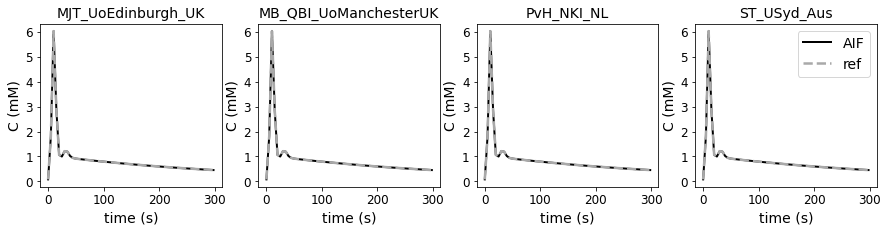

In [18]:
data_original = df[(df['source']=='original')]  

fig, axs = plt.subplots(1, no_authors, sharey='none',figsize=(15,3))

for current_author in range(no_authors):
    plt.subplot(1,no_authors,current_author+1)
    subset_data = data_original[data_original['author'] == author_list[current_author]]
    plt.plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF", linewidth=2)
    plt.plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref',linewidth=2.5)
    
    plt.title(author_list[current_author],fontsize=14)
    plt.xlabel('time (s)', fontsize=14)
    plt.ylabel('C (mM)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    if current_author == no_authors-1:
        axs[current_author].legend(fontsize=14)


### Different acquisition times

This test data was added to check whether the contributions can work with acquisition times different from the original reference.
There are no errors for different acquisition times.  

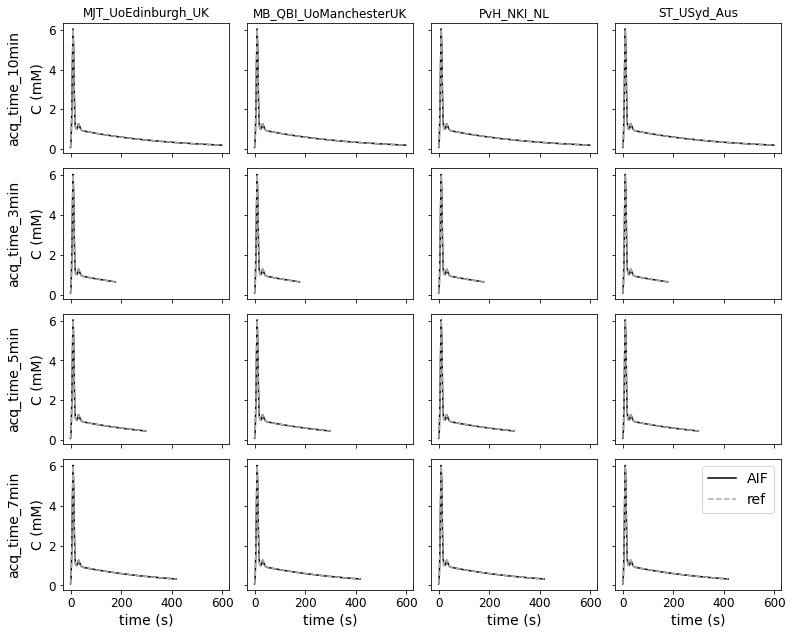

In [15]:
data_acqtime = df[(df['source']=='acq_time')]
acq_list = data_acqtime.label.unique()
no_acq = len(acq_list)

fig, ax = plt.subplots(no_acq, no_authors, sharex='col', sharey='row', figsize=(12,9))

for current_acq in range(no_acq):
    for current_author in range(no_authors):
        subset_data = data_acqtime[(data_acqtime['author'] == author_list[current_author]) & (data_acqtime['label'] == acq_list[current_acq])]
        ax[current_acq,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_acq,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

        if current_acq == 0:
            ax[current_acq,current_author].set_title(author_list[current_author])
        if current_author == 0:
            ax[current_acq,current_author].set_ylabel('C (mM)', fontsize=14)
        if current_acq == no_acq-1:
            ax[current_acq,current_author].set_xlabel('time (s)', fontsize=14)
        ax[current_acq,current_author].tick_params(axis='x', labelsize=12)
        ax[current_acq,current_author].tick_params(axis='y', labelsize=12)

            

ax[no_acq-1,no_authors-1].legend(fontsize=14)

# add extra labels for rows (example taken from: https://microeducate.tech/row-and-column-headers-in-matplotlibs-subplots/)
pad = 5
for a, row in zip(ax[:,0], acq_list):
    a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points', ha='right', va='center', rotation=90, fontsize=14)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)


### Different temporal resolutions

This test data was added to check whether the contributions can work with temporal resolutions different from the original reference. 
There are no errors for various temporal resolutions.

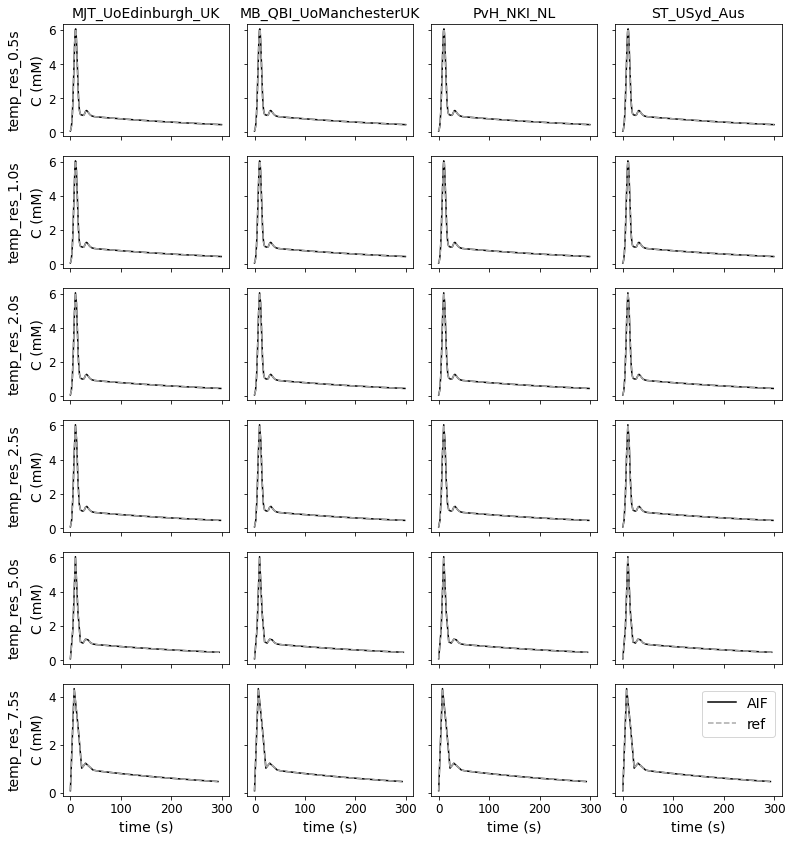

In [7]:
data_res = df[(df['source']=='temp_res')]
res_list = data_res.label.unique()
no_res = len(res_list)

fig, ax = plt.subplots(no_res, no_authors, sharex='col', sharey='row', figsize=(12,12))

for current_res in range(no_res):
    for current_author in range(no_authors):
        subset_data = data_res[(data_res['author'] == author_list[current_author]) & (data_res['label'] == res_list[current_res])]
        ax[current_res,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_res,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

        if current_res == 0:
            ax[current_res,current_author].set_title(author_list[current_author], fontsize=14)
        if current_author == 0:
            ax[current_res,current_author].set_ylabel('C (mM)', fontsize=14)
        if current_res == no_res-1:
            ax[current_res,current_author].set_xlabel('time (s)', fontsize=14)
        ax[current_res,current_author].tick_params(axis='x', labelsize=12)
        ax[current_res,current_author].tick_params(axis='y', labelsize=12)

ax[no_res-1,no_authors-1].legend(fontsize=14)

# add extra labels for rows
pad = 5
for a, row in zip(ax[:,0], res_list):
    a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                ha='right', va='center', rotation=90, fontsize=14)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

### Variations in bolus arrival time

This test data was added to check how contributions deal with a difference in bolus arrival time. The figures are zoomed on the first 50 s to show the differences in implementations.

Notes: 
- Not all contributions allowed for a variation in bolus arrival time.
- There are slight differences for delays that are not exact multiplications of the temporal resolution. In some cases the AIF was recalculated, in others the original AIF was shifted to the nearest integer.

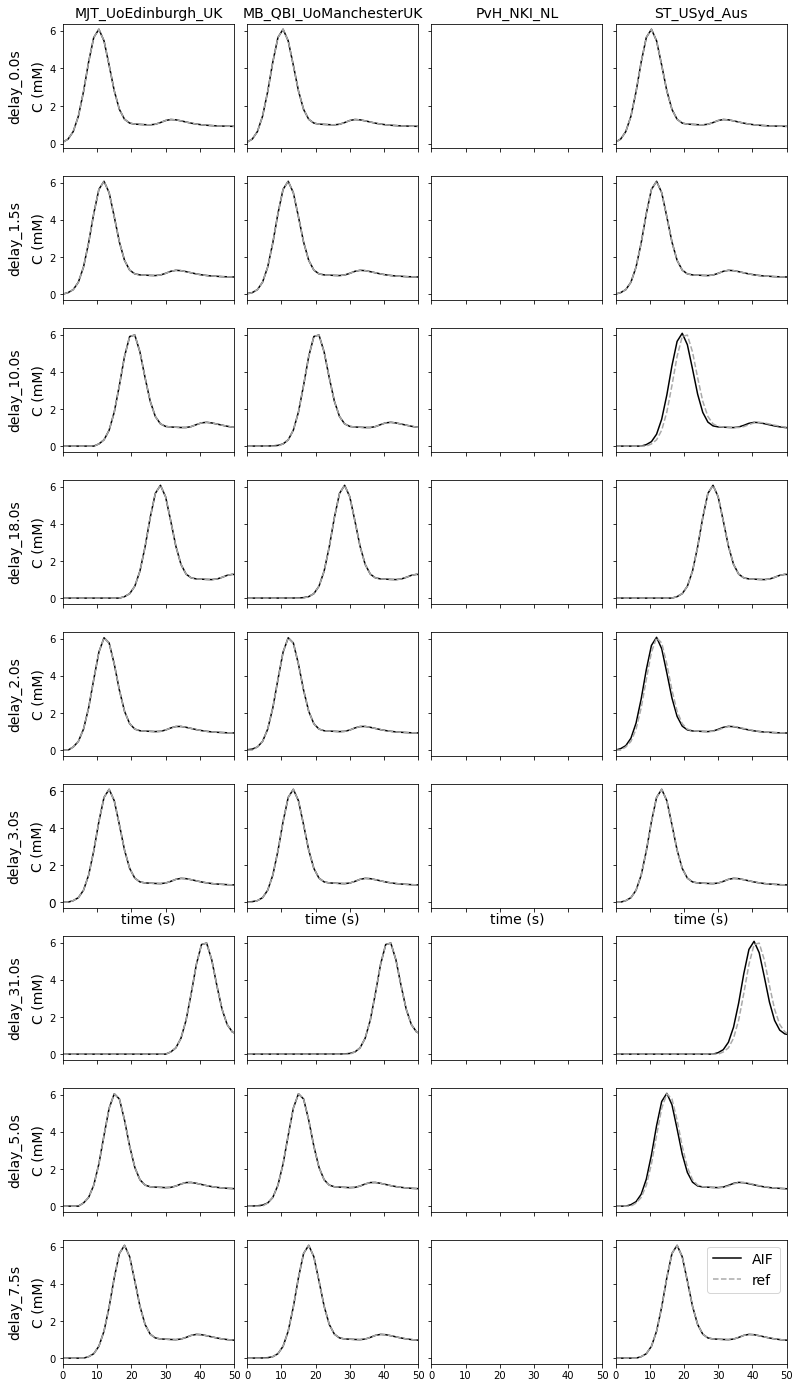

In [8]:
data_delay = df[(df['source']=='delay')]
delay_list = data_delay.label.unique()
no_delay = len(delay_list)

fig, ax = plt.subplots(no_delay, no_authors, sharex='col', sharey='row', figsize=(12,20))

for current_delay in range(no_delay):
    for current_author in range(no_authors):
        subset_data = data_delay[(data_delay['author'] == author_list[current_author]) & (data_delay['label'] == delay_list[current_delay])]
        ax[current_delay,current_author].plot(subset_data.time_ref, subset_data.cb_measured, color='black',label ="AIF")
        ax[current_delay,current_author].plot(subset_data.time_ref, subset_data.aif_ref, color='darkgrey', linestyle='dashed', label='ref')

        if current_delay == 0:
            ax[current_delay,current_author].set_title(author_list[current_author], fontsize=14)
        if current_author == 0:
            ax[current_delay,current_author].set_ylabel('C (mM)', fontsize=14)
        if current_delay == no_res-1:
            ax[current_delay,current_author].set_xlabel('time (s)', fontsize=14)
        
        ax[current_delay,current_author].set_xlim([0, 50])
        
        ax[current_res,current_author].tick_params(axis='x', labelsize=12)
        ax[current_res,current_author].tick_params(axis='y', labelsize=12)

ax[no_delay-1,no_authors-1].legend(fontsize=14)

# add extra labels for rows
pad = 5
for a, row in zip(ax[:,0], delay_list):
    a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - pad, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90, fontsize=14)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

## Notes
Additional notes/remarks

### References

Parker et al. Experimentally-Derived Functional Form for a Population-Averaged High-Temporal-Resolution Arterial Input Function for Dynamic Contrast-Enhanced MRI. Magnetic Resonance in Medicine 56:993–1000 (2006); DOI 10.1002/mrm.21066